# Bank Churn Prediction 

Objective: 
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.  
 
Context:  
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.  
 
Data Description:  
The case study is from an open-source dataset from Kaggle.  The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. 

In [193]:
#Load basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import math
import numbers
import random
import operator
import random

#import standard visualization

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chisquare
import scipy.stats as stats
from scipy.stats import chi2_contingency
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
from IPython.display import HTML, display
from IPython.core import display as ICD
from pandas.plotting import scatter_matrix
pd.options.display.max_columns = None
import warnings
import scikitplot as skplt
warnings.filterwarnings('ignore')


#Load machine learning libraries

from sklearn import ensemble, metrics
from sklearn import model_selection
#from sklearn.model_selection import cross_validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix
#from pandas_ml import ConfusionMatrix (returns attribute error: no imputer)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

#Load neural network libraries

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading and initial analysis

In [2]:
bcm_df = pd.read_csv("bank.csv")
bcm_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bcm_df.shape

(10000, 14)

In [4]:
bcm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bcm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
#Check for missing values, incorrect data, duplicate data 

print ("\nMissing values :  ", bcm_df.isnull().sum().values.sum())

print ("\nUnique values :  \n", bcm_df.nunique())

print ("\nDuplicate values :  \n", bcm_df.duplicated().sum())


Missing values :   0

Unique values :  
 RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Duplicate values :  
 0


In [7]:
#Dropping columns with unique values for all customers

bcm_df.drop('RowNumber', axis=1, inplace = True)
bcm_df.drop('CustomerId', axis=1, inplace = True)

bcm_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
bcm_df.shape

(10000, 12)

In [9]:
bcm_df.cov() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,9341.860157,-4.019150,0.235355,3.780408e+04,0.687999,-0.240492,1.239139,-7.694701e+03,-1.054722
Age,-4.019150,109.994084,-0.303229,1.852533e+04,-0.187157,-0.056036,0.448026,-4.343373e+03,1.205250
Tenure,0.235355,-0.303229,8.364673,-2.211395e+03,0.022616,0.029773,-0.040997,1.294687e+03,-0.016309
Balance,37804.076998,18525.333354,-2211.394696,3.893436e+09,-11039.815064,-422.619801,-314.483074,4.592389e+07,2978.931708
NumOfProducts,0.687999,-0.187157,0.022616,-1.103982e+04,0.338322,0.000844,0.002794,4.751478e+02,-0.011203
HasCrCard,-0.240492,-0.056036,0.029773,-4.226198e+02,0.000844,0.207791,-0.002703,-2.604105e+02,-0.001310
IsActiveMember,1.239139,0.448026,-0.040997,-3.144831e+02,0.002794,-0.002703,0.249797,-3.282927e+02,-0.031429
EstimatedSalary,-7694.701048,-4343.372926,1294.686597,4.592389e+07,475.147781,-260.410522,-328.292660,3.307457e+09,280.204670
Exited,-1.054722,1.205250,-0.016309,2.978932e+03,-0.011203,-0.001310,-0.031429,2.802047e+02,0.162223


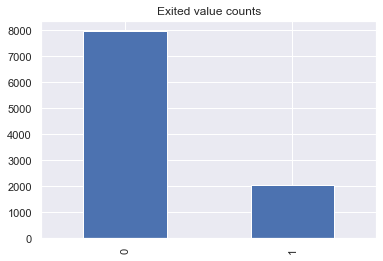

In [10]:
#Exploratory data analysis

value_counts = bcm_df['Exited'].value_counts()
value_counts.plot.bar(title = 'Exited value counts')

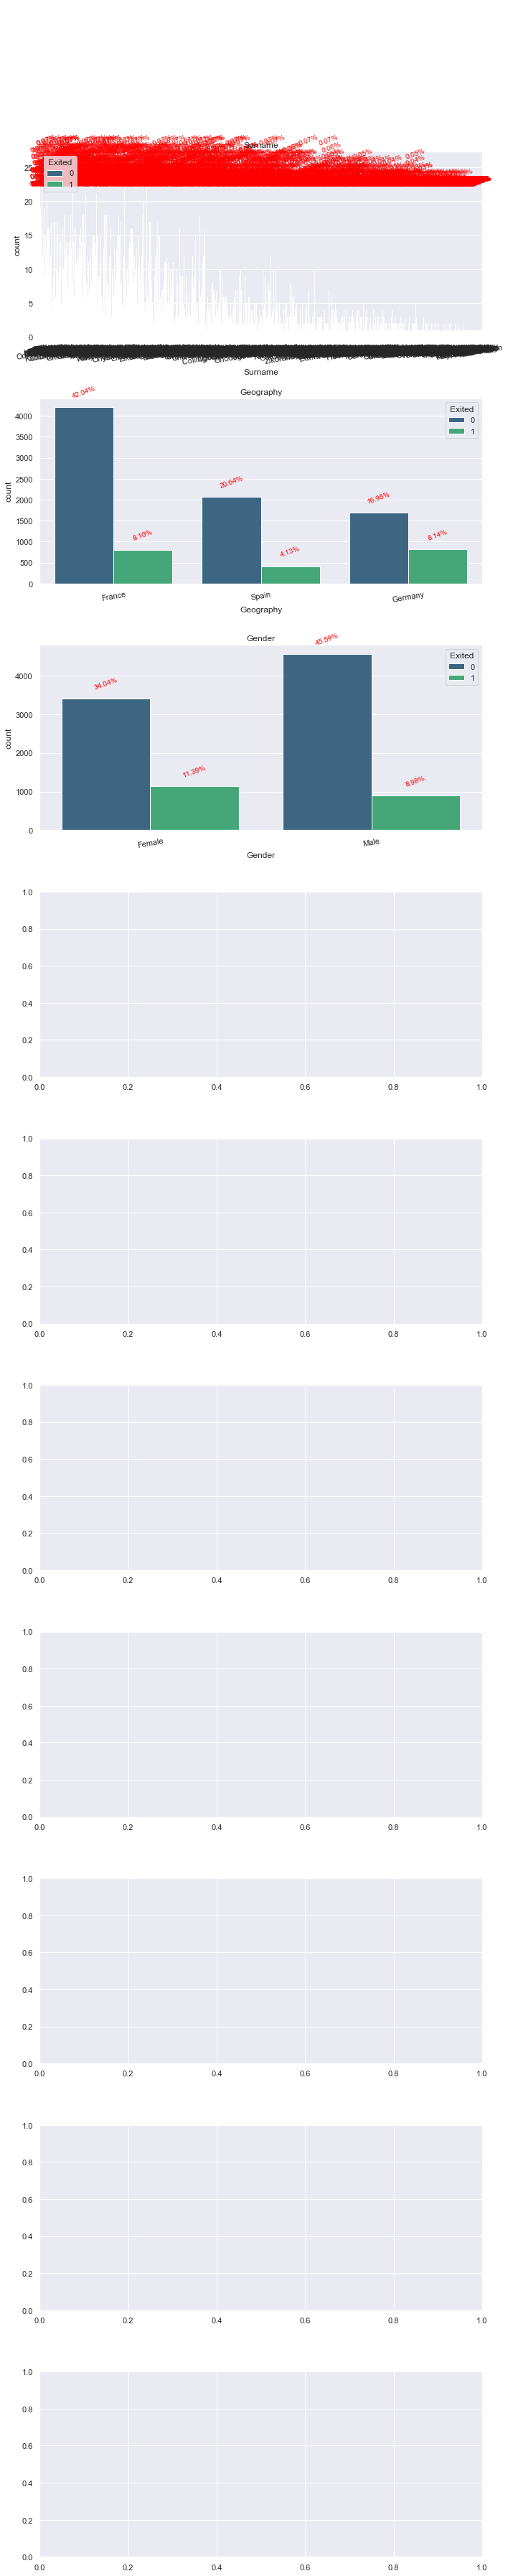

In [11]:
objs = bcm_df.select_dtypes('object')
objs = objs.dropna()
fig, ax = plt.subplots(10, 1, figsize=(10,50))
for i, obj in enumerate(objs):
    sns.countplot(obj, data=bcm_df, hue='Exited', orient='vertical', ax=ax[i], palette='viridis')
    for p in ax[i].patches:
        y=p.get_bbox().get_points()[1,1]
        ax[i].annotate('{:1.2f}%'.format(100.*y/bcm_df[obj].count()), (p.get_x()+0.2, p.get_height()+20), 
            ha='center', va='bottom',fontsize=10, color='red', rotation=20, xytext=(0, 10),
         textcoords='offset points') # set the alignment of the text

    ax[i].tick_params(axis='x', rotation=10)
    ax[i].set_title(obj)
    plt.tight_layout()

In [11]:
#Creating matrice

X = bcm_df.iloc[:, 0:11].values
y = bcm_df.iloc[:, 11].values

In [12]:
#Encoding categorical data

le = preprocessing.LabelEncoder()
X = bcm_df.apply(le.fit_transform)
X.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,289,308,0,0,21,1,0,1,0,0,4704,0
4,1822,459,2,0,25,2,3696,0,1,1,3925,0


In [13]:
#Encoding categorical data

enc = preprocessing.OneHotEncoder()
enc.fit(X)
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape

(10000, 19869)

In [14]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [15]:
type(onehotlabels)

numpy.ndarray

In [16]:
X.shape

(10000, 12)

In [17]:
#Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
#Feature Scaling

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train.shape

(8000, 12)

In [20]:
X_test.shape

(2000, 12)

In [33]:
X2 = X_train.reshape(-1,12)

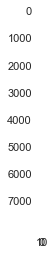

In [34]:
plt.imshow(X2,cmap='gray')

In [37]:
X3 = X_test.reshape(-1,12)

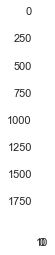

In [39]:
plt.imshow(X3,cmap='gray')

In [40]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [41]:
y_train.shape

(8000, 10)

In [42]:
y_test.shape

(2000, 10)

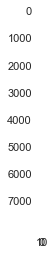

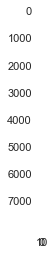

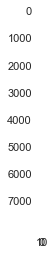

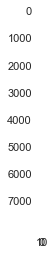

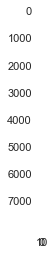

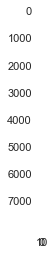

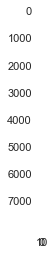

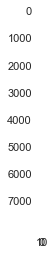

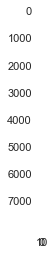

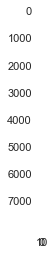

In [45]:
for i in range(10):
    image = X2#[i]
    plt.figure(i)
    plt.imshow(image)

# Building Artifical Neural Network

In [49]:
#Initialising the Artificial Neural Network for model "Classifier1"

# Initialize the constructor
classifier1 = Sequential()

# Define model architecture

# Adding the input layer and the first hidden layer
classifier1.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Adding the second hidden layer
classifier1.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier1.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier1.fit(X_test, y_test, batch_size = 32, epochs = 100)

Train on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 1s 398us/sample - loss: 2.0517 - accuracy: 0.7850
Epoch 2/100
2000/2000 [==============================] - 0s 74us/sample - loss: 0.7322 - accuracy: 0.7975
Epoch 3/100
2000/2000 [==============================] - 0s 77us/sample - loss: 0.5254 - accuracy: 0.7975
Epoch 4/100
2000/2000 [==============================] - 0s 75us/sample - loss: 0.5108 - accuracy: 0.7975
Epoch 5/100
2000/2000 [==============================] - 0s 68us/sample - loss: 0.4988 - accuracy: 0.7975
Epoch 6/100
2000/2000 [==============================] - 0s 68us/sample - loss: 0.4884 - accuracy: 0.7975
Epoch 7/100
2000/2000 [==============================] - 0s 74us/sample - loss: 0.4714 - accuracy: 0.7975
Epoch 8/100
2000/2000 [==============================] - 0s 73us/sample - loss: 0.4508 - accuracy: 0.7975
Epoch 9/100
2000/2000 [==============================] - 0s 69us/sample - loss: 0.4231 - accuracy: 0.7975
Epoch 10/100
2000/2000 

Epoch 75/100
2000/2000 [==============================] - 0s 74us/sample - loss: 2.4048e-05 - accuracy: 1.0000
Epoch 76/100
2000/2000 [==============================] - 0s 68us/sample - loss: 2.3068e-05 - accuracy: 1.0000
Epoch 77/100
2000/2000 [==============================] - 0s 68us/sample - loss: 2.2123e-05 - accuracy: 1.0000
Epoch 78/100
2000/2000 [==============================] - 0s 71us/sample - loss: 2.1219e-05 - accuracy: 1.0000
Epoch 79/100
2000/2000 [==============================] - 0s 82us/sample - loss: 2.0363e-05 - accuracy: 1.0000
Epoch 80/100
2000/2000 [==============================] - 0s 76us/sample - loss: 1.9551e-05 - accuracy: 1.0000
Epoch 81/100
2000/2000 [==============================] - 0s 70us/sample - loss: 1.8760e-05 - accuracy: 1.0000
Epoch 82/100
2000/2000 [==============================] - 0s 66us/sample - loss: 1.8004e-05 - accuracy: 1.0000
Epoch 83/100
2000/2000 [==============================] - 0s 68us/sample - loss: 1.7293e-05 - accuracy: 1.0000
E

In [50]:
#Customize the learning rate to 0.001 in sgd optimizer and run the model "Classifier2"

#Initialize the sequential model
classifier2=tf.keras.models.Sequential()

# Add dense layer which provides 10 outputs after applying softmax
classifier2.add(tf.keras.layers.Dense(10,activation='softmax'))

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
classifier2.compile(optimizer=sgd_optimizer,loss='binary_crossentropy',metrics=['accuracy'])

classifier2.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test),batch_size=32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 126us/sample - loss: 0.3324 - accuracy: 0.9000 - val_loss: 0.3289 - val_accuracy: 0.9000
Epoch 2/100
8000/8000 [==============================] - 1s 80us/sample - loss: 0.3257 - accuracy: 0.9000 - val_loss: 0.3221 - val_accuracy: 0.9000
Epoch 3/100
8000/8000 [==============================] - 0s 55us/sample - loss: 0.3190 - accuracy: 0.9000 - val_loss: 0.3154 - val_accuracy: 0.9000
Epoch 4/100
8000/8000 [==============================] - 0s 55us/sample - loss: 0.3123 - accuracy: 0.9000 - val_loss: 0.3088 - val_accuracy: 0.9000
Epoch 5/100
8000/8000 [==============================] - 0s 56us/sample - loss: 0.3057 - accuracy: 0.9000 - val_loss: 0.3022 - val_accuracy: 0.9000
Epoch 6/100
8000/8000 [==============================] - 0s 55us/sample - loss: 0.2991 - accuracy: 0.9000 - val_loss: 0.2956 - val_accuracy: 0.9000
Epoch 7/100
8000/8000 [==============================] - 0s 53u

Epoch 56/100
8000/8000 [==============================] - 0s 58us/sample - loss: 0.1127 - accuracy: 0.9603 - val_loss: 0.1118 - val_accuracy: 0.9612
Epoch 57/100
8000/8000 [==============================] - 0s 61us/sample - loss: 0.1116 - accuracy: 0.9609 - val_loss: 0.1107 - val_accuracy: 0.9615
Epoch 58/100
8000/8000 [==============================] - 0s 58us/sample - loss: 0.1105 - accuracy: 0.9614 - val_loss: 0.1096 - val_accuracy: 0.9617
Epoch 59/100
8000/8000 [==============================] - 0s 55us/sample - loss: 0.1094 - accuracy: 0.9618 - val_loss: 0.1086 - val_accuracy: 0.9621
Epoch 60/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.1084 - accuracy: 0.9621 - val_loss: 0.1076 - val_accuracy: 0.9628
Epoch 61/100
8000/8000 [==============================] - 1s 70us/sample - loss: 0.1074 - accuracy: 0.9625 - val_loss: 0.1067 - val_accuracy: 0.9633
Epoch 62/100
8000/8000 [==============================] - 0s 57us/sample - loss: 0.1065 - accuracy: 0.9628

# Model Review
Summarize the model using model.summary


In [51]:
classifier1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                780       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                610       
Total params: 1,546
Trainable params: 1,546
Non-trainable params: 0
_________________________________________________________________


In [52]:
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  130       
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [135]:
#Predicting the Test set results for "Classifier1"

y_pred1 = classifier1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

In [167]:
y_pred2 = y_pred1.reshape(-1,2)

In [168]:
y_test2 = y_test.reshape(-1,2)

In [169]:
y_pred2.shape

(10000, 2)

In [170]:
y_test2.shape

(10000, 2)

In [171]:
#Confusion Matrix

cm = skm.multilabel_confusion_matrix(y_test, y_pred1)
print(cm)

[[[ 405    0]
  [ 842  753]]

 [[1595    0]
  [ 150  255]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]]


In [172]:
cm = skm.multilabel_confusion_matrix(y_test2, y_pred2)
print(cm)

[[[8405    0]
  [ 842  753]]

 [[9595    0]
  [ 150  255]]]


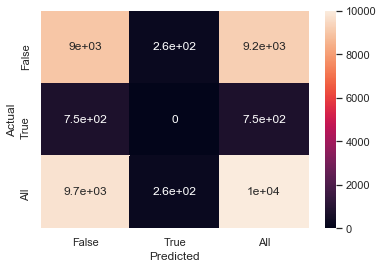

In [174]:
df = pd.DataFrame(y_pred2, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [143]:
print(skm.classification_report(y_test,y_pred)) 


              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1595
           1       1.00      0.03      0.05       405
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.90      0.78      0.84      2000
   macro avg       0.19      0.10      0.10      2000
weighted avg       0.92      0.78      0.76      2000
 samples avg       0.78      0.78      0.78      2000



In [145]:
#Predicting the Test set results for "Classifier2"

y_pred3 = classifier2.predict(X_test)
y_pred3 = (y_pred3 > 0.5)

In [175]:
y_pred4 = y_pred3.reshape(-1,2)

In [176]:
y_test4 = y_test.reshape(-1,2)

In [177]:
y_pred4.shape

(10000, 2)

In [178]:
y_test4.shape

(10000, 2)

In [179]:
#Confusion Matrix

cm = skm.multilabel_confusion_matrix(y_test, y_pred3)
print(cm)


[[[ 224  181]
  [  39 1556]]

 [[1595    0]
  [ 394   11]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]

 [[2000    0]
  [   0    0]]]


In [182]:
cm = skm.multilabel_confusion_matrix(y_test4, y_pred4)
print(cm)

[[[8224  181]
  [  39 1556]]

 [[9595    0]
  [ 394   11]]]


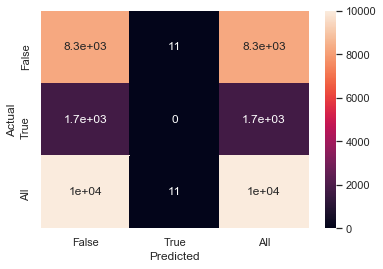

In [183]:
df = pd.DataFrame(y_pred4, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [181]:
print(skm.classification_report(y_test,y_pred)) 


              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1595
           1       1.00      0.03      0.05       405
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.90      0.78      0.84      2000
   macro avg       0.19      0.10      0.10      2000
weighted avg       0.92      0.78      0.76      2000
 samples avg       0.78      0.78      0.78      2000



In [156]:
#Accuracy score for Classifier1

loss, acc = classifier1.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 1.000
Loss: 0.000


In [157]:
#Accuracy score for Classifier2

loss, acc = classifier2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.969
Loss: 0.082


# Conclusion

#1) Classifier1 model is highly accurate with an accuracy of 1 and loss of 0!